In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
restViolNT = pd.read_csv('restViolNT.csv')
restViolNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0


In [3]:
dataPoisNT = pd.read_csv('dataPoisNT.csv')
data311compNT = pd.read_csv('data311compNT.csv')
data311compNT.rename(columns={'pois_complaints':'311complaints'}, inplace=True)
dataPoisNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,pois_complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,69.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,72.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,41.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,59.0


In [4]:
dataPoisNT = dataPoisNT[['boro_ct201', 'pois_complaints']]
data311compNT = data311compNT[['boro_ct201', '311complaints']]

In [5]:
combTemp = restViolNT.merge(dataPoisNT, on='boro_ct201', how='outer')
AllNT = combTemp.merge(data311compNT, on='boro_ct201', how='outer')

AllNT.fillna(value={'rest_Violations':0, 'pois_complaints':0, '311complaints':0}, inplace=True)

AllNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0


In [6]:
AllNT[['Population', 'rest_Violations', 'pois_complaints', '311complaints']].corr()

,Population,rest_Violations,pois_complaints,311complaints
Population,1.000000,0.261593,0.272195,0.316744
rest_Violations,0.261593,1.000000,0.872952,0.865166
pois_complaints,0.272195,0.872952,1.000000,0.860163
311complaints,0.316744,0.865166,0.860163,1.000000


In [7]:
rests = pd.read_csv('Rests.csv')
AllNT = AllNT.merge(rests, on='boro_ct201', how='outer')
AllNT.fillna(value={'Nrestaurants':1}, inplace=True)
AllNT.drop(columns={'Unnamed: 0_x', 'Unnamed: 0_y'}, inplace=True)
AllNT['Nrestaurants'] = AllNT['Nrestaurants']*7
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0


In [8]:
neighbors = pd.read_csv('neighbors.csv')
neighbors.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(neighbors, on='boro_ct201')
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants,NEIGHBORS,NeighbPois,NeighPop
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863


In [9]:
NrestWviol = pd.read_csv('NrestWviol.csv')
NrestWviol.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(NrestWviol, on='boro_ct201', how='outer')
AllNT.fillna(value={'NrestWviol':0}, inplace=True)
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants,NEIGHBORS,NeighbPois,NeighPop,NrestWviol
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056,69.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863,104.0


In [10]:
AllNT[['rest_Violations', 'pois_complaints', '311complaints', 'Nrestaurants', 'NeighbPois', 'NeighPop', 'Population', 
       'NrestWviol']].corr()

,rest_Violations,pois_complaints,311complaints,Nrestaurants,NeighbPois,NeighPop,Population,NrestWviol
rest_Violations,1.000000,0.872952,0.865166,0.775647,0.750140,0.268590,0.261593,0.976710
pois_complaints,0.872952,1.000000,0.860163,0.658111,0.800271,0.306274,0.272195,0.885771
311complaints,0.865166,0.860163,1.000000,0.670981,0.700155,0.314700,0.316744,0.861510
Nrestaurants,0.775647,0.658111,0.670981,1.000000,0.545326,0.150835,0.150750,0.784322
NeighbPois,0.750140,0.800271,0.700155,0.545326,1.000000,0.411476,0.197214,0.771556
NeighPop,0.268590,0.306274,0.314700,0.150835,0.411476,1.000000,0.507066,0.251556
Population,0.261593,0.272195,0.316744,0.150750,0.197214,0.507066,1.000000,0.227500
NrestWviol,0.976710,0.885771,0.861510,0.784322,0.771556,0.251556,0.227500,1.000000


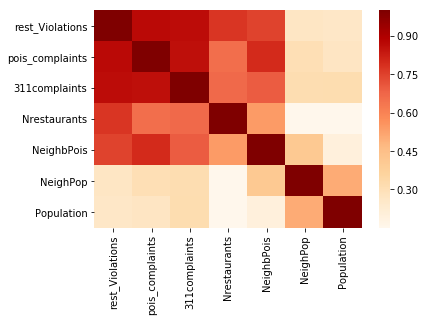

In [11]:
sns.heatmap(AllNT[['rest_Violations', 'pois_complaints', '311complaints', 'Nrestaurants', 'NeighbPois', 'NeighPop', 'Population']].corr()
           , cmap='OrRd')

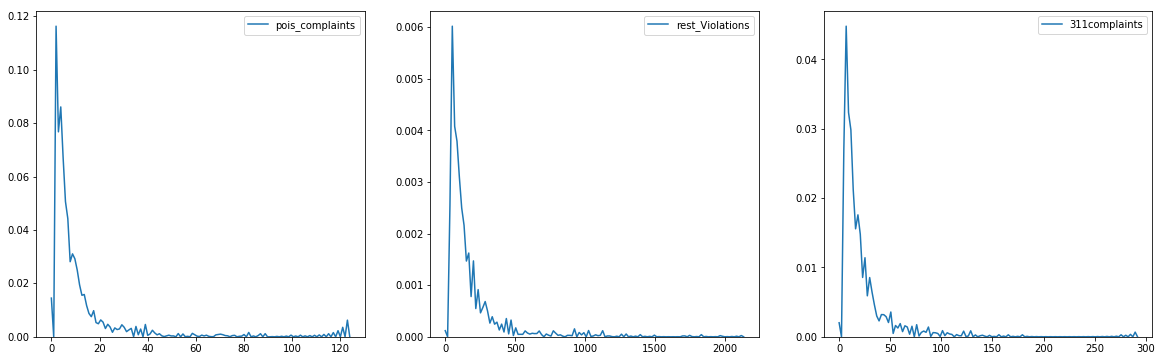

In [12]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['pois_complaints'], bw=0.005)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['rest_Violations'], bw=0.005)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311complaints'], bw=0.005)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


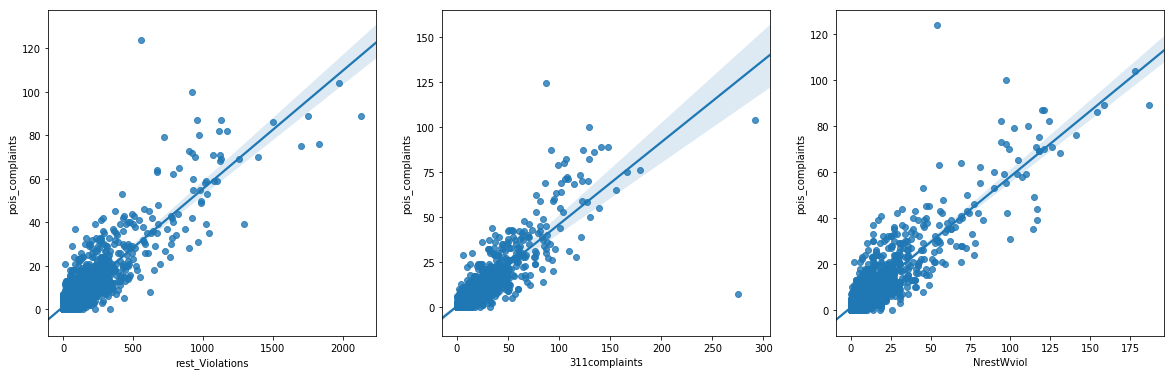

In [13]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.regplot(AllNT['rest_Violations'], AllNT['pois_complaints'])

ax2 = fig.add_subplot(132)
sns.regplot(AllNT['311complaints'], AllNT['pois_complaints'])

ax2 = fig.add_subplot(133)
sns.regplot(AllNT['NrestWviol'], AllNT['pois_complaints'])

In [14]:
X = AllNT[['rest_Violations', '311complaints', 'Population', 'Nrestaurants', 'NrestWviol']]
X = sm.add_constant(X)
y = np.matrix(AllNT['pois_complaints']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     2035.
Date:                Thu, 28 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:27:11   Log-Likelihood:                -6554.8
No. Observations:                2166   AIC:                         1.312e+04
Df Residuals:                    2160   BIC:                         1.316e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0540      0.223      0.243      0.808      -0.383       0.491
rest_Violations    -0.0014      0.003     -0.515      0.607      -0.007       0.004
311complaints       0.1928      0.010     19.606      0.000       0.174       0.212
Population          0.0001   5.29e-05      2.744      0.006    4.14e-05       0.000
Nrestaurants       -0.0406      0.007     -6.050      0.000      -0.054      -0.027
NrestWviol          0.4220      0.028     14.972      0.000       0.367       0.477
==============================================================================
Omnibus:                     1567.192   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246844.629
Skew:                           2.487   Prob(JB):                         0.00
Kurtosis:                      55.061   Cond. No.                     9.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
AllNT['violPres'] = AllNT['rest_Violations']/AllNT['Nrestaurants']
AllNT['poisPres'] = AllNT['pois_complaints']/AllNT['Nrestaurants']
AllNT['311compPres'] = AllNT['311complaints']/AllNT['Nrestaurants']
AllNT['badRestProp'] = AllNT['NrestWviol']/AllNT['Nrestaurants']
AllNT.head(3)

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,311complaints,Nrestaurants,NEIGHBORS,NeighbPois,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,1.0,7.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0,0.000000,0.142857,0.142857,0.000000
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,102.0,154.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0,8.175325,0.448052,0.662338,0.766234
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,108.0,63.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0,14.619048,1.142857,1.714286,1.539683


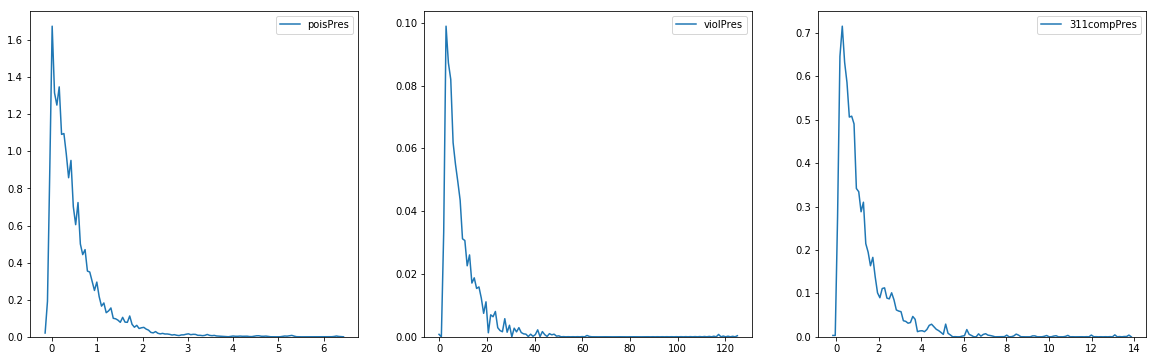

In [16]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['poisPres'], bw=0.05)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['violPres'], bw=0.05)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311compPres'], bw=0.05)

In [19]:
AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'Nrestaurants']].corr()

,violPres,poisPres,311compPres,badRestProp,Nrestaurants
violPres,1.000000,0.695778,0.707795,0.922889,-0.048940
poisPres,0.695778,1.000000,0.757965,0.709880,-0.094515
311compPres,0.707795,0.757965,1.000000,0.681675,-0.112353
badRestProp,0.922889,0.709880,0.681675,1.000000,-0.040707
Nrestaurants,-0.048940,-0.094515,-0.112353,-0.040707,1.000000


In [18]:
X = AllNT[['violPres', '311compPres', 'badRestProp']]
X = sm.add_constant(X)
y = np.matrix(AllNT['pois_complaints']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     110.7
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.10e-66
Time:                        22:27:21   Log-Likelihood:                -8287.1
No. Observations:                2166   AIC:                         1.658e+04
Df Residuals:                    2162   BIC:                         1.660e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4417      0.328     10.492      0.000       2.798       4.085
violPres        0.0092      0.078      0.118      0.906      -0.143       0.161
311compPres     0.9688      0.263      3.687      0.000       0.454       1.484
badRestProp     4.2707      0.800      5.336      0.000       2.701       5.840
==============================================================================
Omnibus:                     1900.654   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56435.737
Skew:                           4.144   Prob(JB):                         0.00
Kurtosis:                      26.593   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
##more models and features
from sklearn.tree import DecisionTreeRegressor
X = AllNT[['violPres', '311compPres', 'badRestProp']]
y = AllNT[['poisPres']]
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

dt=DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(X_train, y_train)
print dt.score(X_test, y_test)
print dt.score(X_train, y_train)

0.5235742704873019
0.6607205456921252


In [139]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
dt.fit(X_train, y_train)
print dt.score(X_test, y_test)
print dt.score(X_train, y_train)

0.523574270487302
0.6607205456921252


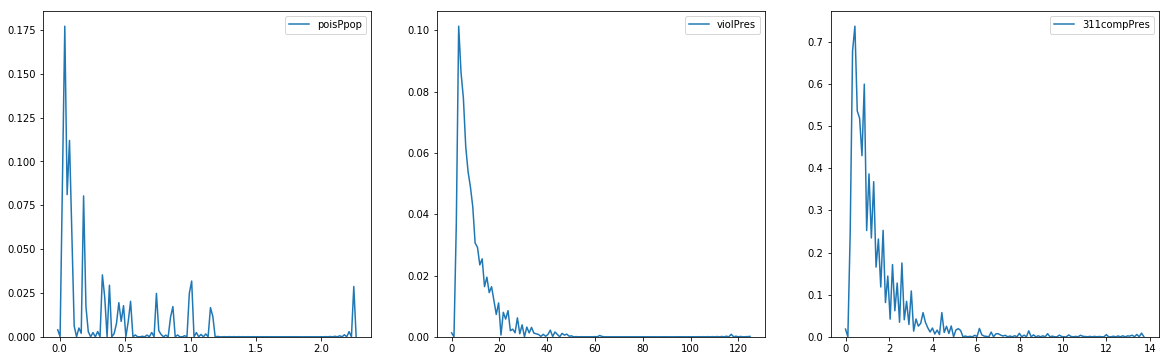

In [122]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['poisPpop'], bw=0.005)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['violPres'], bw=0.005)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311compPres'], bw=0.005)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


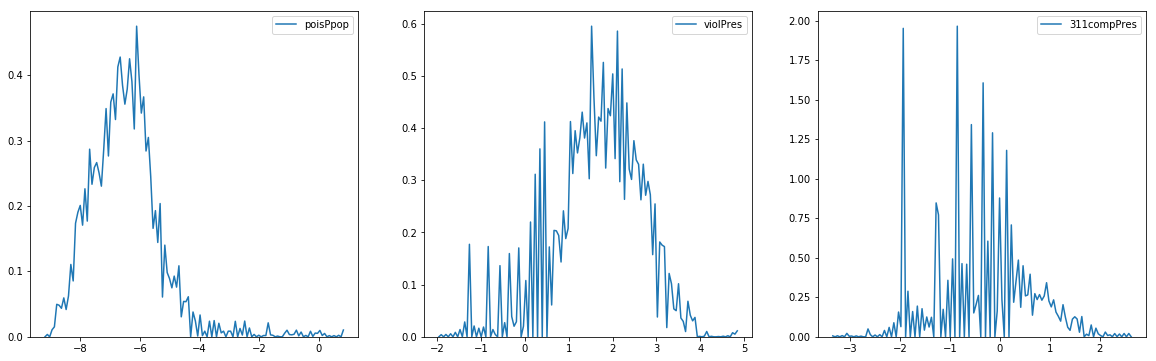

In [123]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(np.log(AllNT['poisPpop']), bw=0.005, ax=ax1)

ax2 = fig.add_subplot(132)
sns.kdeplot(np.log(AllNT['violPres']), bw=0.005, ax=ax2)

ax3 = fig.add_subplot(133)
sns.kdeplot(np.log(AllNT['311compPres']), bw=0.005, ax=ax3)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


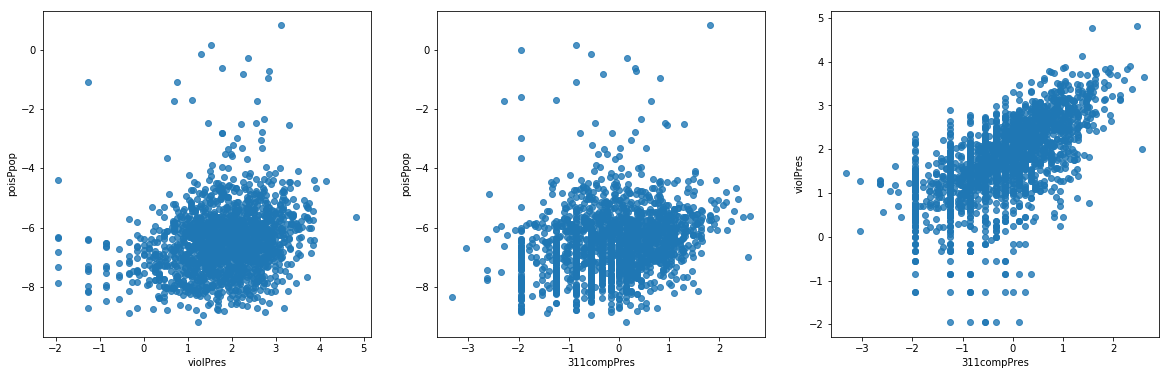

In [124]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.regplot(np.log(AllNT['violPres']), np.log(AllNT['poisPpop']))

ax2 = fig.add_subplot(132)
sns.regplot(np.log(AllNT['311compPres']), np.log(AllNT['poisPpop']))

ax2 = fig.add_subplot(133)
sns.regplot(np.log(AllNT['311compPres']), np.log(AllNT['violPres']))

In [125]:
ct = gpd.read_file('/Users/devashishkhulbe/Downloads/Data/2010 Census Tracts/geo_export_a0d9c6b6-aa01-4614-864e-ae8521d74700.shp')
ct = ct[['boro_ct201', 'geometry']]
ct['boro_ct201'] = ct['boro_ct201'].astype(int)
AllNT.drop(columns={'geometry'}, inplace=True)
ct.head()

,boro_ct201,geometry
0,5000900,POLYGON ((-74.07920577013245 40.64343078374567...
1,1009800,POLYGON ((-73.96432543478758 40.75638153099091...
2,1010000,POLYGON ((-73.96802436915851 40.75957814005282...
3,1010200,POLYGON ((-73.97124277307127 40.76093641847906...
4,1010400,POLYGON ((-73.97445730550224 40.76229308352487...


In [126]:
AllNT = ct.merge(AllNT, on='boro_ct201')
crs = {'init': 'epsg:4326'}
AllNT = gpd.GeoDataFrame(AllNT, crs=crs, geometry='geometry')

In [130]:
AllNT = AllNT[AllNT.Population != 0]
AllNT['ViolProp'] = AllNT['NrestWviol']/AllNT['Nrestaurants']
AllNT[['violPres', '311compPres', 'poisPpop', 'NrestWviol', 'ViolProp']].corr()

,violPres,311compPres,poisPpop,NrestWviol,ViolProp
violPres,1.000000,0.720839,0.028809,0.320294,0.933846
311compPres,0.720839,1.000000,0.049723,0.180673,0.743386
poisPpop,0.028809,0.049723,1.000000,0.104969,0.032257
NrestWviol,0.320294,0.180673,0.104969,1.000000,0.365243
ViolProp,0.933846,0.743386,0.032257,0.365243,1.000000


In [131]:
AllNT[['violPres', '311compPres', 'poisPpop', 'NrestWviol', 'ViolProp']].corr()

,violPres,311compPres,poisPpop,NrestWviol,ViolProp
violPres,1.000000,0.720839,0.028809,0.320294,0.933846
311compPres,0.720839,1.000000,0.049723,0.180673,0.743386
poisPpop,0.028809,0.049723,1.000000,0.104969,0.032257
NrestWviol,0.320294,0.180673,0.104969,1.000000,0.365243
ViolProp,0.933846,0.743386,0.032257,0.365243,1.000000


In [98]:
AllNT['violPres'].describe()

count    2140.000000
mean        7.210315
std         7.981905
min         0.000000
25%         2.089286
50%         4.923469
75%         9.686243
max       124.857143
Name: violPres, dtype: float64

In [99]:
AllNT.to_file('NT/AllNT.shp')